----------
# 1. Risk management

* Провести оцінку розподілу випадкової величини
* згенерувати випадкові сценарії
* продемонструвати залежність середнього від кількості ітерацій.
---------

# Stochastic simulation theory and risk modelling

task: height of the dike

## Flood risks

In reality, dike design is a function of many parameters:

* dike geometries and materials
* hydrological, hydraulic and topographic data
* wind speed and directions
* linked wave effects
* changing roughness due to seasonal vegetation
* effect of sediment transport on flow resistance phenomena

## Model parameters:

The maximal water level of the river (𝑍𝑐) is given as a function of several parameters, some of which are uncertain:

## $𝑍𝑐= \frac{𝑄} {(𝐾𝑠*𝐵*\frac{𝑍𝑚-𝑍𝑣}{𝐿})^\frac{1}{2}} ^\frac{3}{5}$

where

* 𝑍𝑐 is flood level (variable of interest)
* 𝑍𝑚 and 𝑍𝑣 are level of the riverbed, upstream and downstream (uncertain)
* 𝑄 is maximal annual flowrate of the river (uncertain)
* 𝐾𝑠 is Strickler’s roughness coefficient (uncertain)
* 𝐵 and 𝐿 are the width and length of the river cross section (certain)

## Model Parameters:

Input,Description,Unit,Probability distribution

𝑄,Maximal annual flowrate,m³/s,Fit to observations

𝐾𝑠,Strickler coefficient,-,Truncated normal 𝒩(30, 10 on [30, +∞]

𝑍𝑣,River downstream level,m,Triangular 𝒯(49, 50, 51)

𝑍𝑚,River upstream level,m,Triangular 𝒯(54, 55, 56)

𝐿,Length of the river stretch,m,4500

𝐵,River width,m,270


## Flowrate measurements:

You have the following measurements of the maximum flowrate in the river from the past 20 years (observations are expressed in $m³/s$):

999, 657, 513, 954, 1206, 2385, 2655, 801, 639, 1071, 468, 567, 1908, 954, 261, 1953, 1548, 756, 1179

# Task

- Fit a lognormal distribution to the measurements of maximal flowrate
check that a lognormal distribution fits this data well, using a quantile-quantile  plot


- Calculate the average height of the river by making a deterministic  calculation
use median values for each uncertain parameter


- Produce a histogram of possible water levels, given the input uncertainty, using a Monte Carlo approach


- Estimate the 100-year flood level for this river

note: specialists use the term 0.01 annual exceedance probability flood,  meaning a flood that has a 1% chance of happening in any given year


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
flow_rates = [999, 657, 513, 954, 1206, 2385, 2655, 801, 639, 1071, 468, 567, 1908, 954, 261, 1953, 1548, 756, 1179]

### Estimating the parameters (shape, loc, and scale) of a log-normal distribution that best fits the data in the flow_rates dataset.

Here's what each parameter represents:


**_shape_**: affects the shape or spread of the distribution.

**_loc_**: This parameter specifies the location or shift of the distribution along the x-axis. For log-normal, it's often related to the shift from zero (default value).

**_scale_**: influences the spread or width of the distribution.


The fit method uses a method called maximum likelihood estimation (MLE) to estimate these parameters based on the given data (flow_rates). 

Essentially, it tries to find the values for shape, loc, and scale that make the log-normal distribution best match the observed data in terms of likelihood.


They can be used to define a log-normal distribution that is most representative of the given dataset.

In [ ]:
shape, loc, scale = stats.lognorm.fit(flow_rates)

((array([ 331.23371673,  433.16421233,  510.17248319,  577.81415723,
          641.35809881,  703.38902091,  765.55397485,  829.13536466,
          895.31210472,  965.32448997, 1040.62322644, 1123.05373465,
         1215.13763539, 1320.56649751, 1445.17366978, 1599.10852002,
         1802.6235533 , 2106.38031441, 2706.54600547]),
  array([ 261,  468,  513,  567,  639,  657,  756,  801,  954,  954,  999,
         1071, 1179, 1206, 1548, 1908, 1953, 2385, 2655])),
 (1.0760778385160437, -59.799646156381414, 0.9881264932438729))

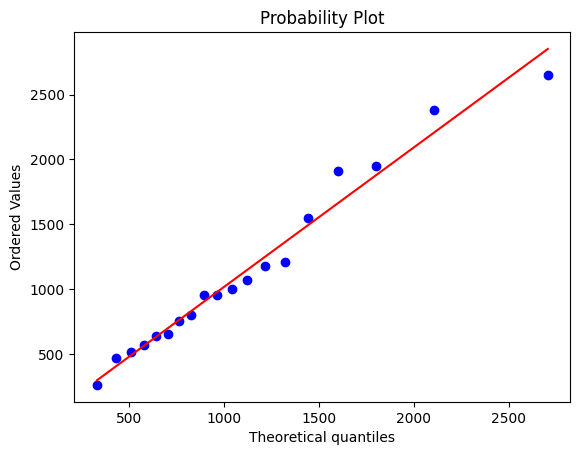

In [ ]:
stats.probplot(flow_rates, dist=stats.lognorm(shape, loc, scale), plot=plt.figure().add_subplot(111))

In [ ]:
def calculate_zc(q, k, b, zm, zv, l):
  zc = (q/(k*b*math.sqrt((zm-zv)/l)))**(3/5)
  return zc

In [ ]:
def calculate_triangular_median(min_val, center_val, max_val):
    return (min_val + max_val + center_val) / 3

In [ ]:
L = 4500
B = 270
Q = stats.lognorm(shape, loc, scale)
Q_median = stats.rv_continuous.median(Q)
Ks_min = 30
Ks_center = 30 + 10
Ks_median = stats.rv_continuous.median(stats.truncnorm(0, float("inf"), loc=30, scale=10))
Zv_median = calculate_triangular_median(49, 50, 51)
Zm_median = calculate_triangular_median(54, 55, 56)

print(f"Median for maximal annual flowrate (Q): {Q_median} m³/s")
print(f"Median for Strickler’s roughness coefficient (Ks): {Ks_median}")
print(f"Median for river downstream level (Zv): {Zv_median} m")
print(f"Median for river upstream level (Zm): {Zm_median} m")

Median for maximal annual flowrate (Q): 965.3244899705297 m³/s
Median for Strickler’s roughness coefficient (Ks): 36.744897501960814
Median for river downstream level (Zv): 50.0 m
Median for river upstream level (Zm): 55.0 m


In [ ]:
median_Zc = calculate_zc(Q_median, Ks_median, B, Zm_median, Zv_median, L)
print(f"The median flood level Zc is: {median_Zc} meters")

The median flood level Zc is: 1.901692373082254 meters


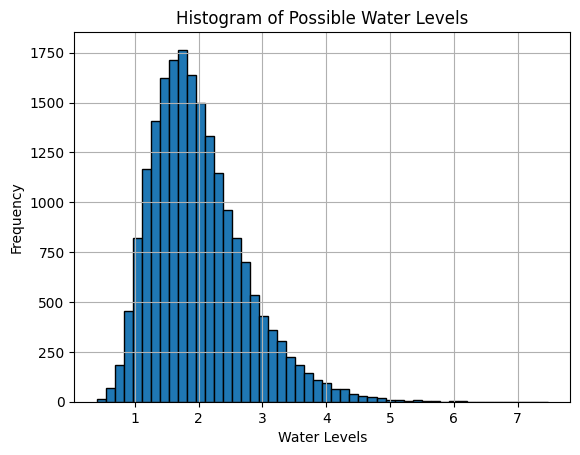

In [ ]:
num_simulations = 20000
Zv_values = np.random.triangular(49, 50, 51, size=num_simulations)
Zm_values = np.random.triangular(54, 55, 56, size=num_simulations)

water_levels = []
for i in range(num_simulations):
    q_sample = stats.lognorm(shape, loc, scale).rvs(1)[0]
    ks_sample = stats.truncnorm(0, float("inf"), loc=30, scale=10).rvs(1)[0]
    idx = np.random.randint(0, len(Zv_values))
    water_level = calculate_zc(q_sample, ks_sample, B, Zm_values[idx], Zv_values[idx], L)
    water_levels.append(water_level)

plt.hist(water_levels, bins=50, edgecolor='black')
plt.xlabel('Water Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Possible Water Levels')
plt.grid(True)
plt.show()


In [ ]:
flood_level_100_year = np.percentile(water_levels, 99)
flood_level_100_year

4.259032460150794

In [ ]:
shape, loc, scale = stats.lognorm.fit(water_levels)
lognorm_dist = stats.lognorm(shape, loc=loc, scale=scale)
ks_statistic, p_value = stats.kstest(water_levels, lognorm_dist.cdf)

print(f"Kolmogorov-Smirnov Test for Lognormal Distribution:")
print(f"Test Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The lognormal distribution fits the data well (at 5% significance level).")
else:
    print("The lognormal distribution does not fit the data well (at 5% significance level).")


Kolmogorov-Smirnov Test for Lognormal Distribution:
Test Statistic: 0.003704275875478835
P-value: 0.945642379413535
The lognormal distribution fits the data well (at 5% significance level).


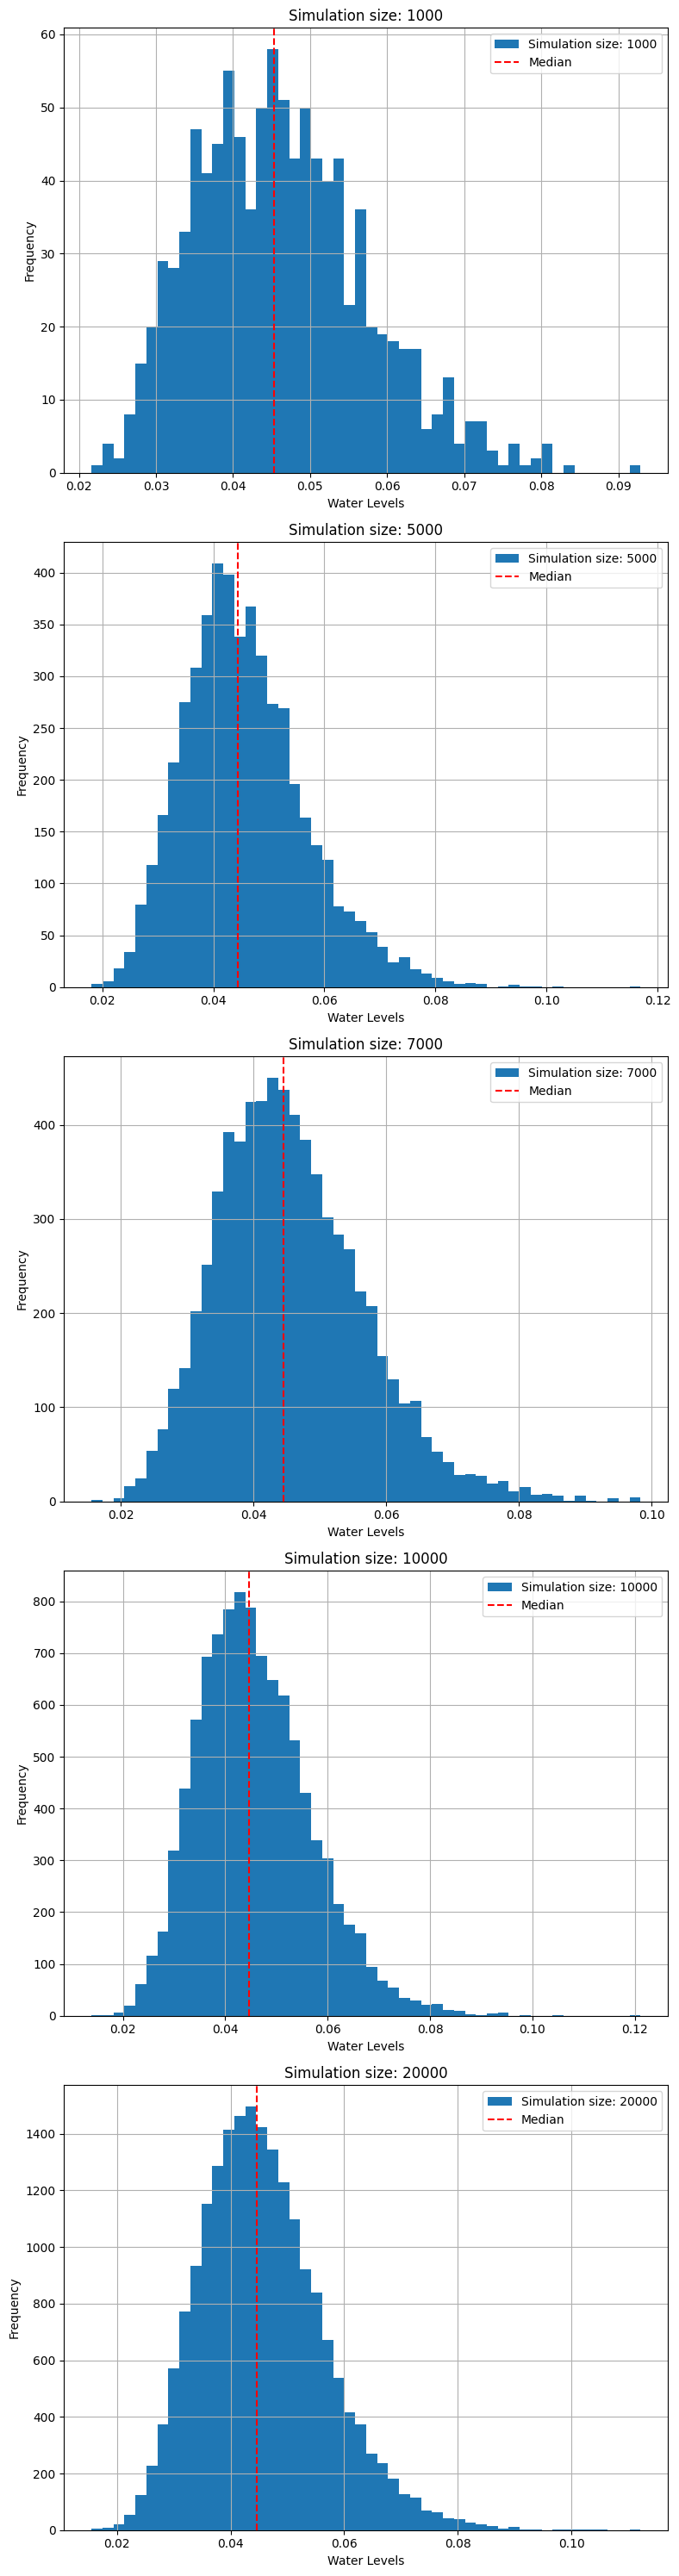

In [ ]:

num_simulations = [1000, 5000, 7000, 10000, 20000]


fig, axs = plt.subplots(len(num_simulations), 1, figsize=(8, 6 * len(num_simulations)))
medians = []
averages = []
for i, simulation in enumerate(num_simulations):
    Zv_values = np.random.triangular(49, 50, 51, size=simulation)
    Zm_values = np.random.triangular(54, 55, 56, size=simulation)

    water_levels = []
    for j in range(simulation):
        q_sample = stats.lognorm(shape, loc, scale).rvs(1)[0]
        ks_sample = stats.truncnorm(0, float("inf"), loc=30, scale=10).rvs(1)[0]
        idx = np.random.randint(0, len(Zv_values))
        water_level = calculate_zc(q_sample, ks_sample, B, Zm_values[idx], Zv_values[idx], L)
        water_levels.append(water_level)
    medians.append(np.median(water_levels))
    averages.append(np.mean(water_levels))
    axs[i].hist(water_levels, bins=50, label=f'Simulation size: {simulation}')
    axs[i].axvline(np.median(water_levels), color='red', linestyle='dashed', linewidth=1.5, label='Median')
    axs[i].set_xlabel('Water Levels')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Simulation size: {simulation}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


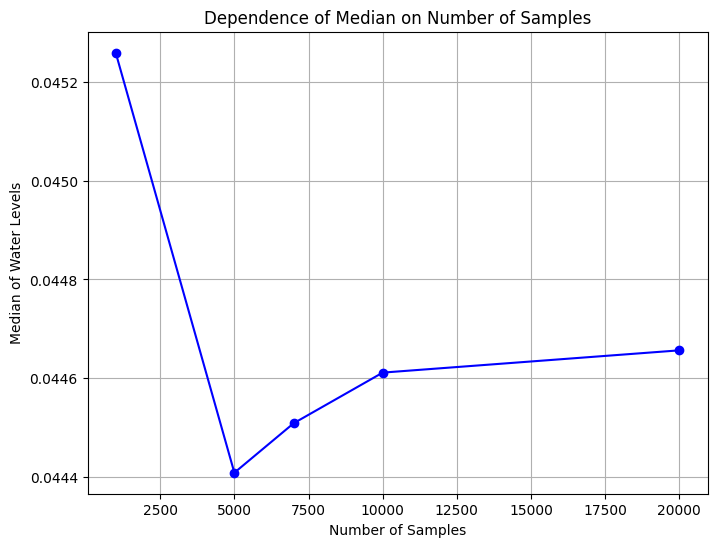

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(num_simulations, medians, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Samples')
plt.ylabel('Median of Water Levels')
plt.title('Dependence of Median on Number of Samples')
plt.grid(True)
plt.show()

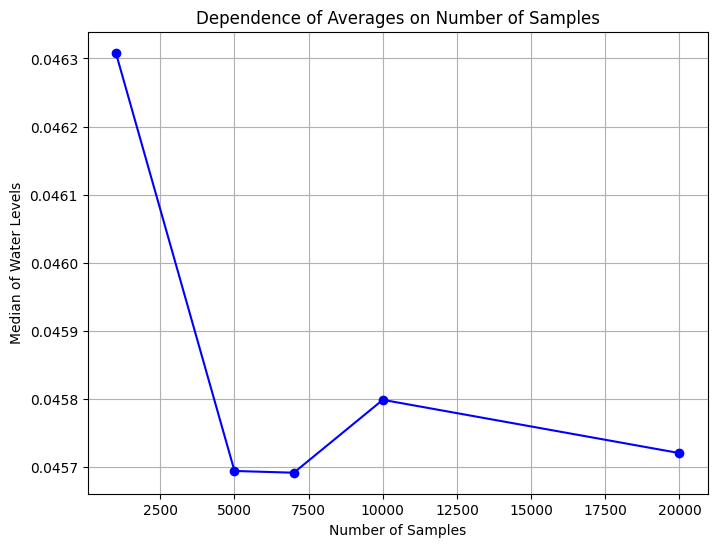

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(num_simulations, averages, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Samples')
plt.ylabel('Median of Water Levels')
plt.title('Dependence of Averages on Number of Samples')
plt.grid(True)
plt.show()

----
# 2.	Генерація синтетичних даних

 Використовуючи файли psql_create.sql та psql_insert.sql згенерувати схему бази даних та заповнити її відповідними семплами.

 -----

* провалідувати існуючі моделі генерації синтетичних даних
* порівняти результати використовуючи статистичні тести
* навести приклади добре та погано згенерованих даних
* зробити відповідні висновки

In [2]:
import numpy as np
import pandas as pd
from scipy import stats


In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)


**_data preparation:_**

In [4]:
from sdv.datasets.local import load_csvs
data = load_csvs(folder_name='tables/')

In [5]:
data.keys()

dict_keys(['customers', 'products', 'orders', 'productlines', 'payments', 'orderdetails', 'employees', 'offices'])

In [6]:
data['customers'].head(3)

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0


**_creating metadata_**

In [7]:
from sdv.metadata import MultiTableMetadata
metadata = MultiTableMetadata()

In [8]:
metadata.detect_from_dataframes(data)

/Users/lilianagocko/Downloads/forecasting/lab6_2/myenv/lib/python3.9/site-packages/sdv/metadata/multi_table.py:442: UserWarning: Could not automatically add relationships for all tables. The relationships in the dataset are disjointed. Tables ['employees', 'offices'] are not connected to any of the other tables.
  warnings.warn(warning_msg)


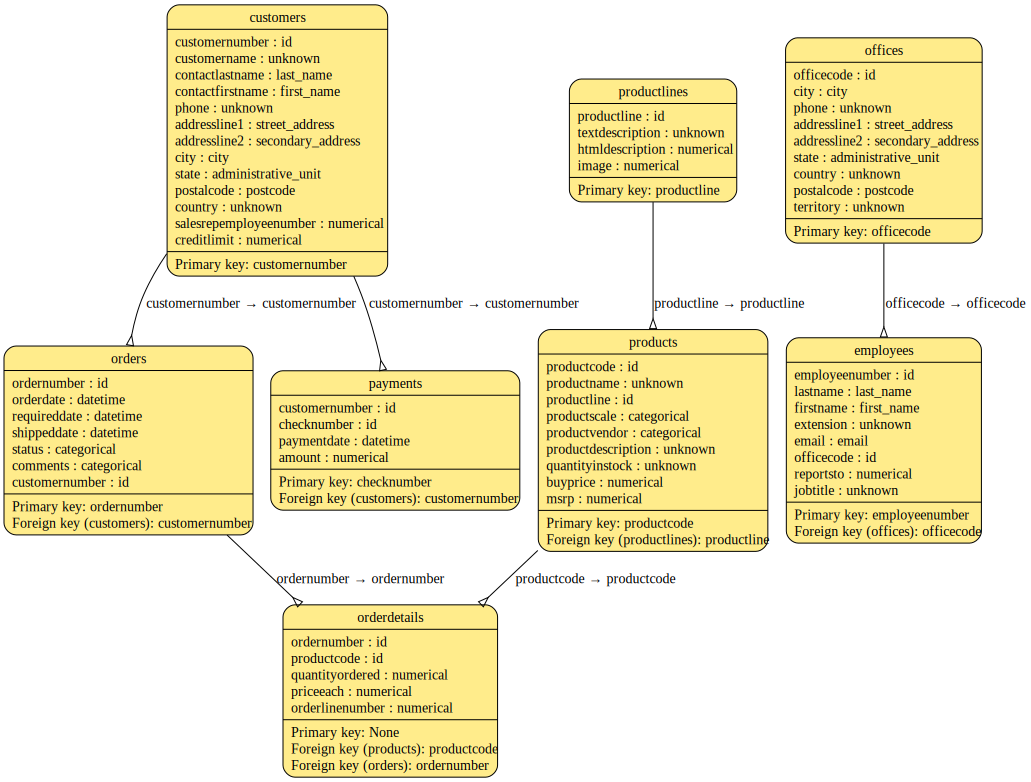

In [9]:
metadata.visualize()

**_fixing the types of variables used in the tables_**

In [10]:
metadata.update_column(table_name='employees', column_name='lastname', sdtype='last_name')
metadata.update_column(table_name='employees', column_name='firstname', sdtype='first_name')
metadata.update_column(table_name='employees', column_name='extension', sdtype='categorical') 
metadata.update_column(table_name='employees', column_name='email', sdtype='email')
metadata.update_column(table_name='employees', column_name='officecode', sdtype='id')
metadata.update_column(table_name='employees', column_name='jobtitle', sdtype='categorical')
metadata.update_column(table_name='employees', column_name='reportsto', sdtype='id')
metadata.update_column(table_name='customers', column_name='customername', sdtype='first_name')
metadata.update_column(table_name='customers', column_name='phone', sdtype='phone_number')
metadata.update_column(table_name='customers', column_name='addressline1', sdtype='street_address')
metadata.update_column(table_name='customers', column_name='addressline2', sdtype='secondary_address')
metadata.update_column(table_name='customers', column_name='city', sdtype='city')
metadata.update_column(table_name='customers', column_name='state', sdtype='administrative_unit')
metadata.update_column(table_name='customers', column_name='country', sdtype='country_code')
metadata.update_column(table_name='customers', column_name='salesrepemployeenumber', sdtype='id')
metadata.update_column(table_name='products', column_name='productname', sdtype='text')
metadata.update_column(table_name='products', column_name='productline', sdtype='categorical')
metadata.update_column(table_name='products', column_name='productdescription', sdtype='text')
metadata.update_column(table_name='products', column_name='quantityinstock', sdtype='numerical')
metadata.update_column(table_name='products', column_name='productline', sdtype='id')
metadata.update_column(table_name='productlines', column_name='textdescription', sdtype='text')
metadata.update_column(table_name='productlines', column_name='productline', sdtype='id')
metadata.update_column(table_name='offices', column_name='phone', sdtype='phone_number')
metadata.update_column(table_name='offices', column_name='addressline1', sdtype='street_address')
metadata.update_column(table_name='offices', column_name='addressline2', sdtype='secondary_address')
metadata.update_column(table_name='offices', column_name='state', sdtype='administrative_unit')
metadata.update_column(table_name='offices', column_name='country', sdtype='country_code')
metadata.update_column(table_name='offices', column_name='territory', sdtype='categorical')

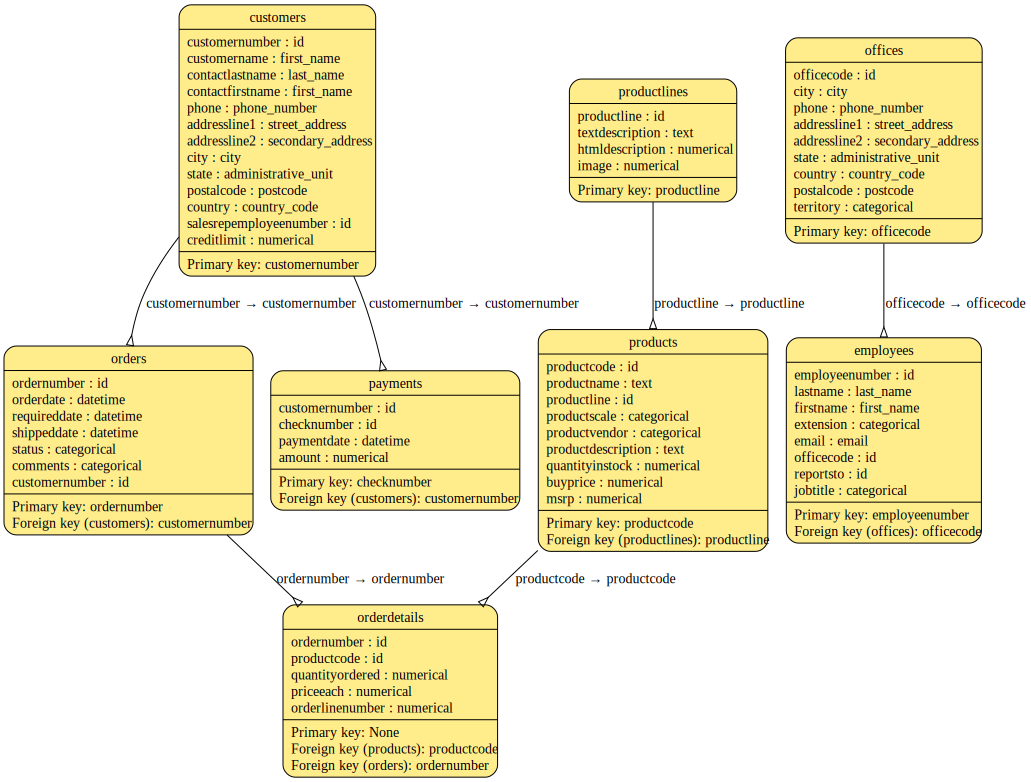

In [11]:
metadata.visualize()

**_data is still unjoint_**

In [11]:
metadata.add_relationship(
    parent_table_name='employees',
    parent_primary_key='employeenumber',
    child_table_name='customers',
    child_foreign_key='salesrepemployeenumber'
)

**_final metadata_**

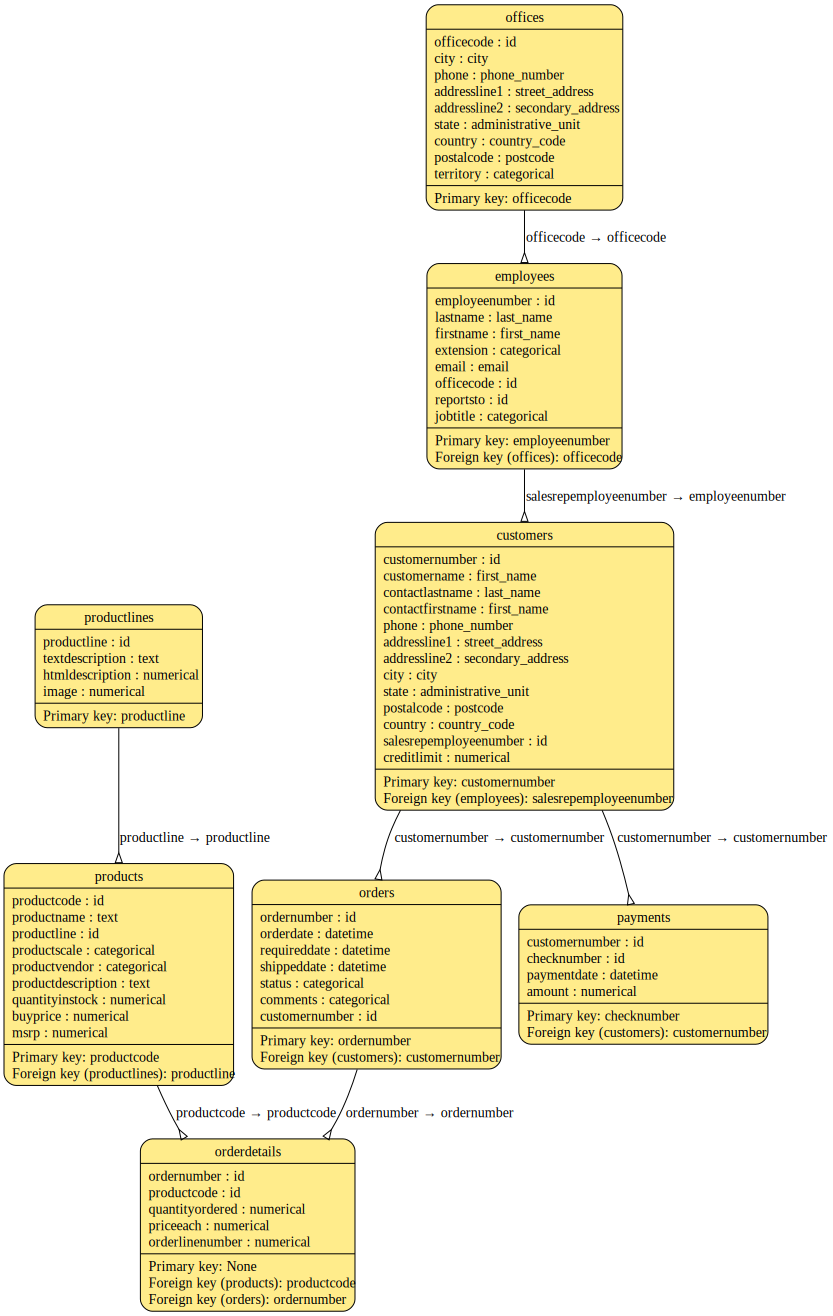

In [13]:
metadata.visualize()

**_in the 'customers' table we have some NaN values in salesrepemployeenumber, so I will replace them with randomly chosen from employeenumber column_**

In [14]:
data['customers'][data['customers']['salesrepemployeenumber'].isnull()]


,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,NaN,Warszawa,NaN,01-012,Poland,NaN,0.0
21,169,Porto Imports Co.,de Castro,Isabel,(1) 356-5555,Estrada da saúde n. 58,NaN,Lisboa,NaN,1756,Portugal,NaN,0.0
36,206,"Asian Shopping Network, Co",Walker,Brydey,+612 9411 1555,Suntec Tower Three,8 Temasek,Singapore,NaN,038988,Singapore,NaN,0.0
41,223,Natürlich Autos,Kloss,Horst,0372-555188,Taucherstraße 10,NaN,Cunewalde,NaN,01307,Germany,NaN,0.0
44,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",NaN,Madrid,NaN,28001,Spain,NaN,0.0
48,247,Messner Shopping Network,Messner,Renate,069-0555984,Magazinweg 7,NaN,Frankfurt,NaN,60528,Germany,NaN,0.0
54,273,"Franken Gifts, Co",Franken,Peter,089-0877555,Berliner Platz 43,NaN,München,NaN,80805,Germany,NaN,0.0
59,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,NaN,Fribourg,NaN,1700,Switzerland,NaN,0.0
62,303,Schuyler Imports,Schuyler,Bradley,+31 20 491 9555,Kingsfordweg 151,NaN,Amsterdam,NaN,1043 GR,Netherlands,NaN,0.0
63,307,Der Hund Imports,Andersen,Mel,030-0074555,Obere Str. 57,NaN,Berlin,NaN,12209,Germany,NaN,0.0


In [12]:
data['customers']['salesrepemployeenumber'] = data['customers']['salesrepemployeenumber'].fillna(data['employees']['employeenumber'].sample(n=1).values[0])

In [16]:
data['customers'][data['customers']['salesrepemployeenumber'].isnull()]

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit


In [13]:
metadata.validate_data(data=data)

**_successful validation_**

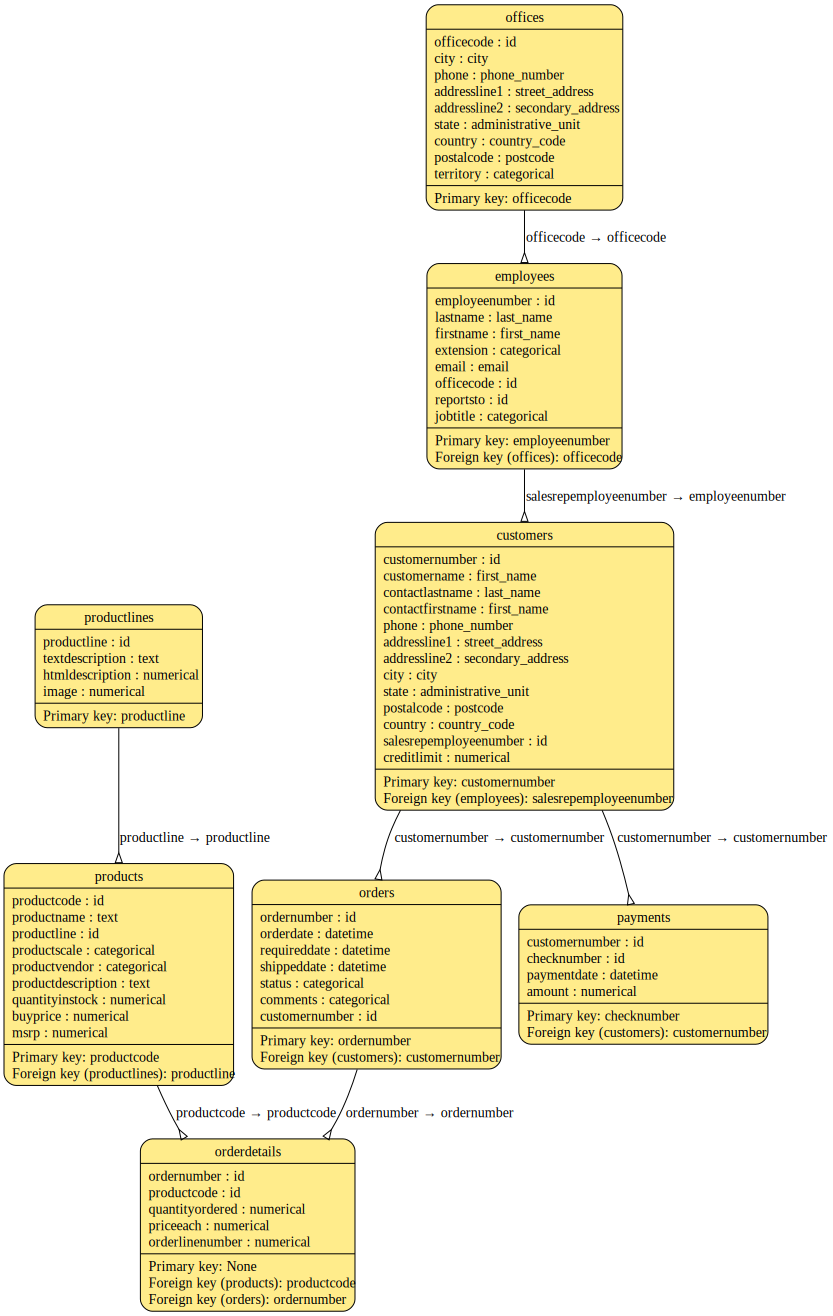

In [18]:
metadata.visualize()

# **_Testing different synthesizers_**

## *_Copula_*

*_Synthesize_*

In [14]:
from sdv.single_table import GaussianCopulaSynthesizer

synthetic_data_copula = {}
for table in metadata.tables:
    synthesizer_copula = GaussianCopulaSynthesizer(metadata.tables[table])
    synthesizer_copula.fit(data[table])
    synthetic_data_copula[table] = synthesizer_copula.sample(len(table))
    
synthetic_data_copula.keys()

dict_keys(['customers', 'products', 'orders', 'productlines', 'payments', 'orderdetails', 'employees', 'offices'])

In [15]:
for table in synthetic_data_copula.keys():
    metadata.tables[table].validate_data(data=synthetic_data_copula[table])

*_Evaluation_*

In [16]:
from sdv.evaluation.single_table import run_diagnostic

copula_diagnostic = []
for table in metadata.tables:
    diagnostic = run_diagnostic(
        real_data=data[table],
        synthetic_data=synthetic_data_copula[table],
        metadata=metadata.tables[table]
    )
    print(f"Diagnostic for {table}:")
    print(diagnostic)
    copula_diagnostic.append([table, diagnostic])
    print()


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 265.68it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for customers:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 464.02it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for products:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 385.65it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for orders:

Generating report ...
(1/2) Evaluating Data Validity: : 100%|██████████| 4/4 [00:00<00:00, 699.55it/s]

/Users/lilianagocko/Downloads/forecasting/lab6_2/myenv/lib/python3.9/site-packages/sdmetrics/single_column/statistical/boundary_adherence.py:58: RuntimeWarning: invalid value encountered in scalar divide
  return valid.sum() / len(synthetic_data)



(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 525.27it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for productlines:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 425.39it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for payments:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 412.05it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for orderdetails:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 534.24it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for employees:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 577.33it/s]

Overall Score: 100.0%

Properties:
- Data Valid

In [17]:
copula_diagnostic = pd.DataFrame(copula_diagnostic, columns=['table', 'diagnostic'])
copula_diagnostic

,table,diagnostic
0,customers,<sdmetrics.reports.single_table.diagnostic_rep...
1,products,<sdmetrics.reports.single_table.diagnostic_rep...
2,orders,<sdmetrics.reports.single_table.diagnostic_rep...
3,productlines,<sdmetrics.reports.single_table.diagnostic_rep...
4,payments,<sdmetrics.reports.single_table.diagnostic_rep...
5,orderdetails,<sdmetrics.reports.single_table.diagnostic_rep...
6,employees,<sdmetrics.reports.single_table.diagnostic_rep...
7,offices,<sdmetrics.reports.single_table.diagnostic_rep...


In [18]:
from sdv.evaluation.single_table import evaluate_quality

copula_evaluation = []
for table in metadata.tables:
    quality_report = evaluate_quality(
        real_data=data[table],
        synthetic_data=synthetic_data_copula[table],
        metadata=metadata.tables[table]
    )
    print(f"Quality report for {table}:")
    print(quality_report)
    copula_evaluation.append([table, quality_report])
    print()


Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 78/78 [00:00<00:00, 21547.50it/s]

Overall Score: 70.49%

Properties:
- Column Shapes: 70.49%
- Column Pair Trends: nan%
Quality report for customers:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 169.67it/s]

Overall Score: 49.11%

Properties:
- Column Shapes: 62.77%
- Column Pair Trends: 35.45%
Quality report for products:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 21/21 [00:00<00:00, 98.77it/s] 

Overall Score: 58.2%

Properties:
- Column Shapes: 63.24%
- Column Pair Trends: 53.17%
Quality report for orders:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 6/6 [00:00<00:00, 765.87it/s]

/Users/lilianagocko/Downloads/forecasting/lab6_2/myenv/lib/python3.9/site-packages/sdmetrics/reports/base_report.py:194: RuntimeWarning: Mean of empty slice
  self._overall_score = np.nanmean(scores)




Overall Score: nan%

Properties:
- Column Shapes: nan%
- Column Pair Trends: nan%
Quality report for productlines:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 6/6 [00:00<00:00, 393.23it/s]

Overall Score: 82.51%

Properties:
- Column Shapes: 73.28%
- Column Pair Trends: 91.73%
Quality report for payments:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 314.09it/s]

Overall Score: 85.26%

Properties:
- Column Shapes: 77.68%
- Column Pair Trends: 92.84%
Quality report for orderdetails:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 28/28 [00:00<00:00, 725.52it/s]

Overall Score: 44.57%

Properties:
- Column Shapes: 54.35%
- Column Pair Trends: 34.78%
Quality report for employees:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 13387.26it/s]

Overall Score: 75.0%

Properties:
- Column Shapes: 75.0%
- Column Pair Trends: 

In [19]:
copula_evaluation = pd.DataFrame(copula_evaluation, columns=['table', 'quality_report'])
copula_evaluation

,table,quality_report
0,customers,<sdmetrics.reports.single_table.quality_report...
1,products,<sdmetrics.reports.single_table.quality_report...
2,orders,<sdmetrics.reports.single_table.quality_report...
3,productlines,<sdmetrics.reports.single_table.quality_report...
4,payments,<sdmetrics.reports.single_table.quality_report...
5,orderdetails,<sdmetrics.reports.single_table.quality_report...
6,employees,<sdmetrics.reports.single_table.quality_report...
7,offices,<sdmetrics.reports.single_table.quality_report...


# **_CTGAN_**

*_Synthesize_*

In [48]:
from sdv.single_table import CTGANSynthesizer

synthetic_data_ctgan = {}
for table in metadata.tables:
    synthesizer_ctgan = CTGANSynthesizer(metadata.tables[table])
    synthesizer_ctgan.fit(data[table])
    synthetic_data_ctgan[table] = synthesizer_ctgan.sample(len(table))
    
synthetic_data_ctgan.keys()

dict_keys(['customers', 'products', 'orders', 'productlines', 'payments', 'orderdetails', 'employees', 'offices'])

In [49]:
for table in synthetic_data_ctgan.keys():
    metadata.tables[table].validate_data(data=synthetic_data_ctgan[table])

*_Evaluation_*

In [50]:
from sdv.evaluation.single_table import run_diagnostic

ctgan_diagnostic = []
for table in metadata.tables:
    diagnostic = run_diagnostic(
        real_data=data[table],
        synthetic_data=synthetic_data_ctgan[table],
        metadata=metadata.tables[table]
    )
    print(f"Diagnostic for {table}:")
    print(diagnostic)
    ctgan_diagnostic.append([table, diagnostic])
    print()

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 442.11it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for customers:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 374.96it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for products:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 188.22it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for orders:

Generating report ...
(1/2) Evaluating Data Validity: : 100%|██████████| 4/4 [00:00<00:00, 695.40it/s]

/Users/lilianagocko/Downloads/forecasting/lab6_2/myenv/lib/python3.9/site-packages/sdmetrics/single_column/statistical/boundary_adherence.py:58: RuntimeWarning:

invalid value encountered in scalar divide




(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 284.40it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for productlines:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 434.42it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for payments:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 387.89it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for orderdetails:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 421.07it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Diagnostic for employees:

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 357.91it/s]

Overall Score: 100.0%

Properties:
- Data Valid

In [51]:
from sdv.evaluation.single_table import evaluate_quality

ctgan_evaluation = []

for table in metadata.tables:
    quality_report = evaluate_quality(
        real_data=data[table],
        synthetic_data=synthetic_data_ctgan[table],
        metadata=metadata.tables[table]
    )
    print(f"Quality report for {table}:")
    print(quality_report)
    ctgan_evaluation.append([table, quality_report])
    print()

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 78/78 [00:00<00:00, 20707.37it/s]

Overall Score: 68.58%

Properties:
- Column Shapes: 68.58%
- Column Pair Trends: nan%
Quality report for customers:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 179.07it/s]

Overall Score: 44.51%

Properties:
- Column Shapes: 63.32%
- Column Pair Trends: 25.69%
Quality report for products:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 21/21 [00:00<00:00, 97.83it/s] 

Overall Score: 38.72%

Properties:
- Column Shapes: 52.9%
- Column Pair Trends: 24.54%
Quality report for orders:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 6/6 [00:00<00:00, 773.81it/s]

/Users/lilianagocko/Downloads/forecasting/lab6_2/myenv/lib/python3.9/site-packages/sdmetrics/reports/base_report.py:194: RuntimeWarning:

Mean of empty slice





Overall Score: nan%

Properties:
- Column Shapes: nan%
- Column Pair Trends: nan%
Quality report for productlines:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 6/6 [00:00<00:00, 480.35it/s]

Overall Score: 71.45%

Properties:
- Column Shapes: 65.68%
- Column Pair Trends: 77.22%
Quality report for payments:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 320.34it/s]

Overall Score: 81.57%

Properties:
- Column Shapes: 74.07%
- Column Pair Trends: 89.07%
Quality report for orderdetails:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 28/28 [00:00<00:00, 758.89it/s]

Overall Score: 32.61%

Properties:
- Column Shapes: 52.17%
- Column Pair Trends: 13.04%
Quality report for employees:

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 14313.67it/s]

Overall Score: 50.0%

Properties:
- Column Shapes: 50.0%
- Column Pair Trends: 

In [52]:
ctgan_evaluation = pd.DataFrame(ctgan_evaluation, columns=['table', 'quality_report'])
ctgan_diagnostic = pd.DataFrame(ctgan_diagnostic, columns=['table', 'diagnostic'])


In [53]:
ctgan_diagnostic

,table,diagnostic
0,customers,<sdmetrics.reports.single_table.diagnostic_rep...
1,products,<sdmetrics.reports.single_table.diagnostic_rep...
2,orders,<sdmetrics.reports.single_table.diagnostic_rep...
3,productlines,<sdmetrics.reports.single_table.diagnostic_rep...
4,payments,<sdmetrics.reports.single_table.diagnostic_rep...
5,orderdetails,<sdmetrics.reports.single_table.diagnostic_rep...
6,employees,<sdmetrics.reports.single_table.diagnostic_rep...
7,offices,<sdmetrics.reports.single_table.diagnostic_rep...


In [54]:
ctgan_evaluation

,table,quality_report
0,customers,<sdmetrics.reports.single_table.quality_report...
1,products,<sdmetrics.reports.single_table.quality_report...
2,orders,<sdmetrics.reports.single_table.quality_report...
3,productlines,<sdmetrics.reports.single_table.quality_report...
4,payments,<sdmetrics.reports.single_table.quality_report...
5,orderdetails,<sdmetrics.reports.single_table.quality_report...
6,employees,<sdmetrics.reports.single_table.quality_report...
7,offices,<sdmetrics.reports.single_table.quality_report...


# **_HMA_**

*_Synthesize_*

In [135]:
from sdv.multi_table import HMASynthesizer
synthesizer_hma = HMASynthesizer(metadata)
synthesizer_hma.fit(data)

PerformanceAlert: Using the HMASynthesizer on this metadata schema is not recommended. To model this data, HMA will generate a large number of columns. (1302771203 columns)


     Table Name  # Columns in Metadata  Est # Columns
0     customers                     11            316
1      products                      7             23
2        orders                      5             21
3  productlines                      3            349
4      payments                      2              2
5  orderdetails                      3              3
6     employees                      5          51040
7       offices                      8     1302719449

We recommend simplifying your metadata schema by dropping columns that are not necessary. If this is not possible, contact us at info@sdv.dev for enterprise solutions.



Preprocess Tables: 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]



Learning relationships:


(1/7) Tables 'products' and 'orderdetails' ('productcode'): 100%|██████████| 109/109 [00:25<00:00,  4.30it/s]
(2/7) Tables 'productlines' and 'products' ('productline'): 100%|██████████| 7/7 [00:09<00:00,  1.40s/it]
(3/7) Tables 'orders' and 'orderdetails' ('ordernumber'): 100%|██████████| 326/326 [01:02<00:00,  5.25it/s]
(4/7) Tables 'customers' and 'orders' ('customernumber'): 100%|██████████| 98/98 [01:53<00:00,  1.16s/it]
(5/7) Tables 'customers' and 'payments' ('customernumber'): 100%|██████████| 98/98 [00:11<00:00,  8.36it/s]
(6/7) Tables 'employees' and 'customers' ('salesrepemployeenumber'):  13%|█▎        | 2/15 [00:35<03:51, 17.81s/it]

*_Too big number of proposed table columns in officess._*

*_I will try to use this tool on the first disjoint version instead._*

In [55]:
from sdv.datasets.local import load_csvs
data1 = load_csvs(folder_name='hma1/')
data2 = load_csvs(folder_name='hma2/')

In [56]:
data1.keys()

dict_keys(['employees', 'offices'])

In [57]:
data2.keys()

dict_keys(['customers', 'products', 'orders', 'productlines', 'payments', 'orderdetails'])

In [58]:
from sdv.metadata import MultiTableMetadata

metadata1 = MultiTableMetadata()
metadata2 = MultiTableMetadata()

metadata1.detect_from_dataframes(data1)
metadata2.detect_from_dataframes(data2)


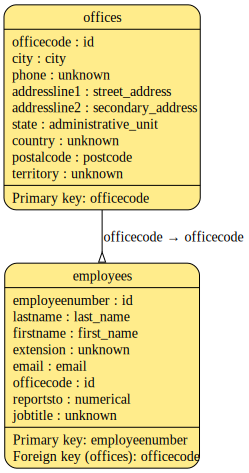

In [59]:
metadata1.visualize()

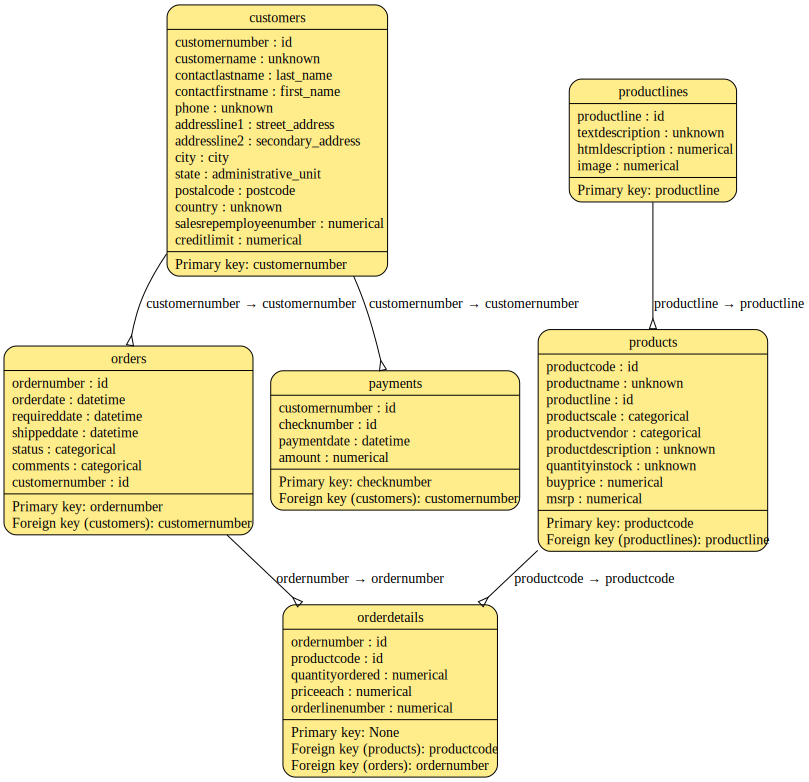

In [60]:
metadata2.visualize()

In [61]:

metadata1.update_column(table_name='employees', column_name='lastname', sdtype='last_name')
metadata1.update_column(table_name='employees', column_name='firstname', sdtype='first_name')
metadata1.update_column(table_name='employees', column_name='extension', sdtype='categorical') 
metadata1.update_column(table_name='employees', column_name='email', sdtype='email')
metadata1.update_column(table_name='employees', column_name='officecode', sdtype='id')
metadata1.update_column(table_name='employees', column_name='jobtitle', sdtype='categorical')
metadata1.update_column(table_name='employees', column_name='reportsto', sdtype='id')
metadata2.update_column(table_name='customers', column_name='customername', sdtype='first_name')
metadata2.update_column(table_name='customers', column_name='phone', sdtype='phone_number')
metadata2.update_column(table_name='customers', column_name='addressline1', sdtype='street_address')
metadata2.update_column(table_name='customers', column_name='addressline2', sdtype='secondary_address')
metadata2.update_column(table_name='customers', column_name='city', sdtype='city')
metadata2.update_column(table_name='customers', column_name='state', sdtype='administrative_unit')
metadata2.update_column(table_name='customers', column_name='country', sdtype='country_code')
metadata2.update_column(table_name='customers', column_name='salesrepemployeenumber', sdtype='id')
metadata2.update_column(table_name='products', column_name='productname', sdtype='text')
metadata2.update_column(table_name='products', column_name='productline', sdtype='categorical')
metadata2.update_column(table_name='products', column_name='productdescription', sdtype='text')
metadata2.update_column(table_name='products', column_name='quantityinstock', sdtype='numerical')
metadata2.update_column(table_name='products', column_name='productline', sdtype='id')
metadata2.update_column(table_name='productlines', column_name='textdescription', sdtype='text')
metadata2.update_column(table_name='productlines', column_name='productline', sdtype='id')
metadata1.update_column(table_name='offices', column_name='phone', sdtype='phone_number')
metadata1.update_column(table_name='offices', column_name='addressline1', sdtype='street_address')
metadata1.update_column(table_name='offices', column_name='addressline2', sdtype='secondary_address')
metadata1.update_column(table_name='offices', column_name='state', sdtype='administrative_unit')
metadata1.update_column(table_name='offices', column_name='country', sdtype='country_code')
metadata1.update_column(table_name='offices', column_name='territory', sdtype='categorical')

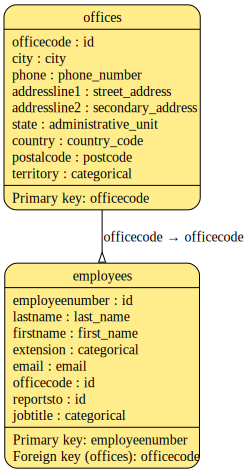

In [62]:
metadata1.visualize()

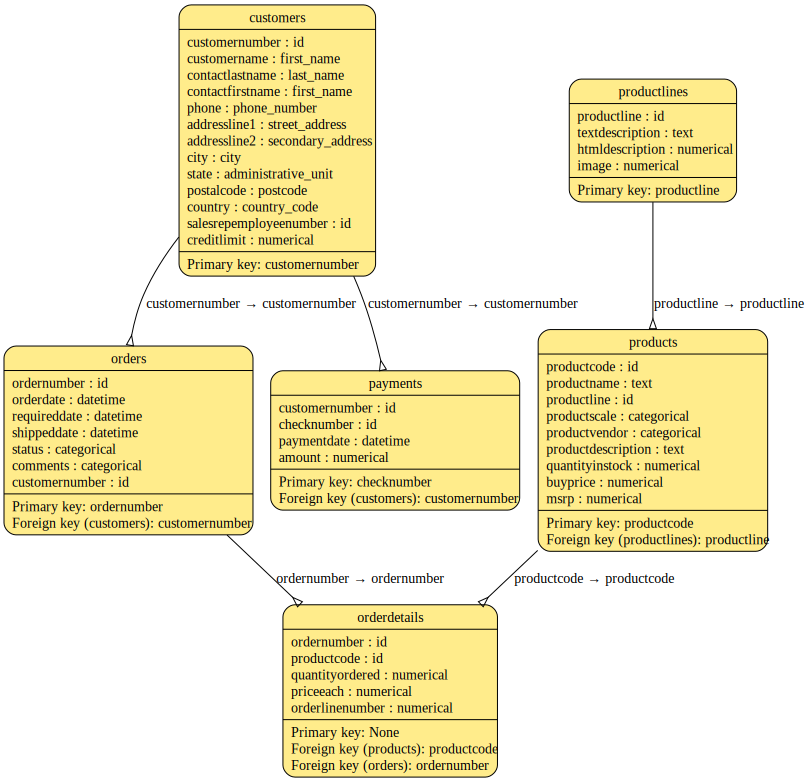

In [63]:
metadata2.visualize()

In [65]:
metadata2.validate()

**_HMA for the first metadata_**

*_Synthesize_*

In [66]:
from sdv.multi_table import HMASynthesizer
synthesizer_hma1 = HMASynthesizer(metadata1)
synthesizer_hma1.fit(data1)

Preprocess Tables:   0%|          | 0/2 [00:00<?, ?it/s]

Preprocess Tables: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]



Learning relationships:


(1/1) Tables 'offices' and 'employees' ('officecode'): 100%|██████████| 7/7 [00:00<00:00,  8.65it/s]


Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


In [67]:
synthetic_data_hma1 = synthesizer_hma1.sample(scale=2)

*_Evaluation_*

In [68]:
from sdv.evaluation.multi_table import run_diagnostic

hma1_diagnostic = run_diagnostic(
    real_data=data1,
    synthetic_data=synthetic_data_hma1,
    metadata=metadata1
)

Generating report ...
(3/3) Evaluating Relationship Validity: : 100%|██████████| 1/1 [00:00<00:00, 143.22it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
- Relationship Validity: 100.0%


In [69]:
from sdv.evaluation.multi_table import evaluate_quality
hma1_evaluation = evaluate_quality(
    data1,
    synthetic_data_hma1,
    metadata1
)

Generating report ...
(4/4) Evaluating Intertable Trends: : 100%|██████████| 72/72 [00:00<00:00, 1319.38it/s]

Overall Score: 56.78%

Properties:
- Column Shapes: 64.13%
- Column Pair Trends: 40.85%
- Cardinality: 85.71%
- Intertable Trends: 36.41%


In [70]:
hma1_evaluation.get_details('Column Shapes')

,Table,Column,Metric,Score
0,employees,extension,TVComplement,0.516304
1,employees,jobtitle,TVComplement,0.782609
2,offices,territory,TVComplement,0.625000


**_HMA for the second metadata_**

In [71]:
data2['customers'][data2['customers']['salesrepemployeenumber'].isnull()]

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,NaN,Warszawa,NaN,01-012,Poland,NaN,0.0
21,169,Porto Imports Co.,de Castro,Isabel,(1) 356-5555,Estrada da saúde n. 58,NaN,Lisboa,NaN,1756,Portugal,NaN,0.0
36,206,"Asian Shopping Network, Co",Walker,Brydey,+612 9411 1555,Suntec Tower Three,8 Temasek,Singapore,NaN,038988,Singapore,NaN,0.0
41,223,Natürlich Autos,Kloss,Horst,0372-555188,Taucherstraße 10,NaN,Cunewalde,NaN,01307,Germany,NaN,0.0
44,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",NaN,Madrid,NaN,28001,Spain,NaN,0.0
48,247,Messner Shopping Network,Messner,Renate,069-0555984,Magazinweg 7,NaN,Frankfurt,NaN,60528,Germany,NaN,0.0
54,273,"Franken Gifts, Co",Franken,Peter,089-0877555,Berliner Platz 43,NaN,München,NaN,80805,Germany,NaN,0.0
59,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,NaN,Fribourg,NaN,1700,Switzerland,NaN,0.0
62,303,Schuyler Imports,Schuyler,Bradley,+31 20 491 9555,Kingsfordweg 151,NaN,Amsterdam,NaN,1043 GR,Netherlands,NaN,0.0
63,307,Der Hund Imports,Andersen,Mel,030-0074555,Obere Str. 57,NaN,Berlin,NaN,12209,Germany,NaN,0.0


In [72]:
data2['customers'] = data2['customers']

In [73]:
#delete columns that are not in metadata

data2['customers'] =  data2['customers'].drop(columns=['addressline2', 'postalcode', 'state'])

In [74]:
data2['customers'].head(3)

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,city,country,salesrepemployeenumber,creditlimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",Nantes,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,Las Vegas,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Melbourne,Australia,1611.0,117300.0


In [102]:
from sdv.multi_table import HMASynthesizer

synthesizer_hma2 = HMASynthesizer(metadata2)
synthesizer_hma2.fit(data2)

Preprocess Tables: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]



Learning relationships:


(1/5) Tables 'orders' and 'orderdetails' ('ordernumber'): 100%|██████████| 326/326 [01:01<00:00,  5.33it/s]
(2/5) Tables 'customers' and 'orders' ('customernumber'): 100%|██████████| 98/98 [01:55<00:00,  1.18s/it]
(3/5) Tables 'customers' and 'payments' ('customernumber'): 100%|██████████| 98/98 [00:11<00:00,  8.38it/s]
(4/5) Tables 'products' and 'orderdetails' ('productcode'): 100%|██████████| 109/109 [00:25<00:00,  4.32it/s]
(5/5) Tables 'productlines' and 'products' ('productline'): 100%|██████████| 7/7 [00:09<00:00,  1.39s/it]


Modeling Tables: 100%|██████████| 2/2 [00:36<00:00, 18.35s/it]


# **_Comparison_**

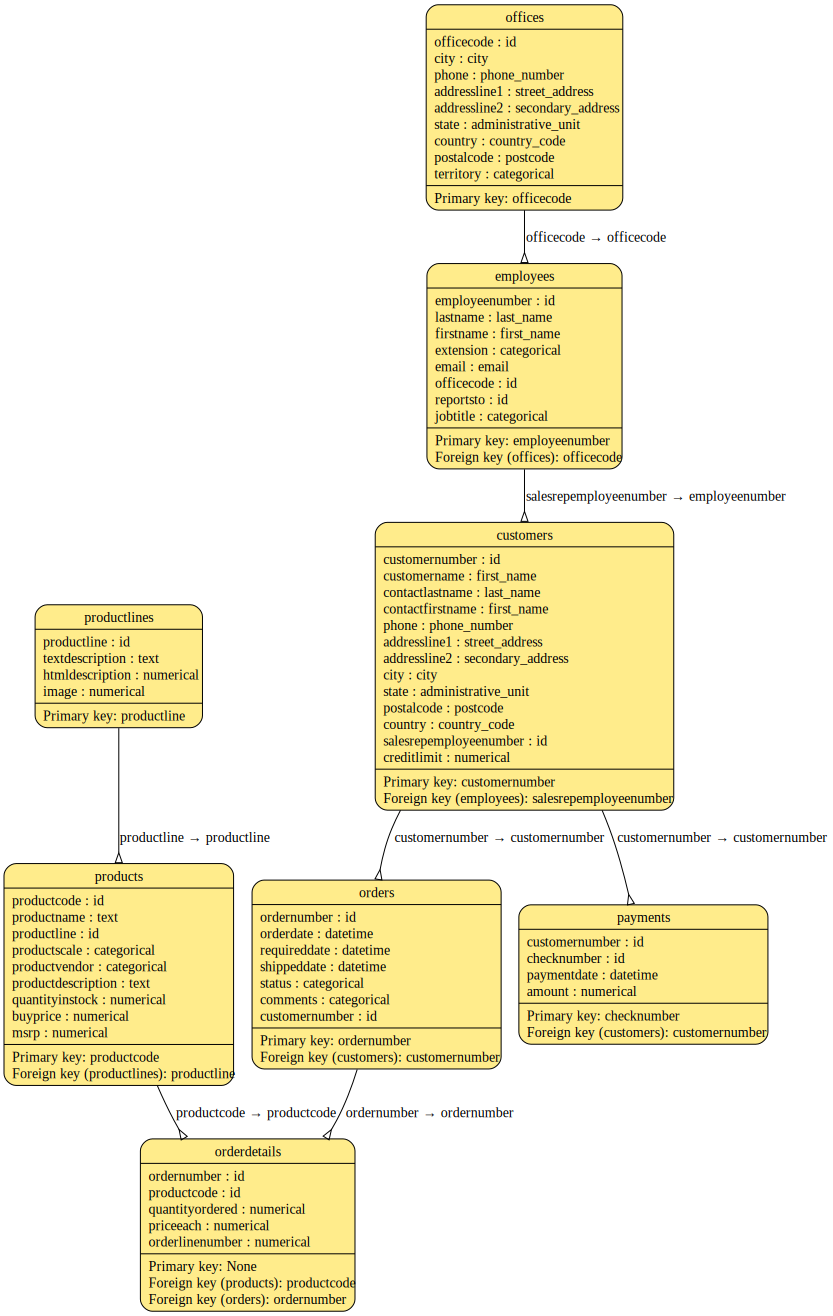

In [54]:
metadata.visualize()

# P.S.: Due to some problems with visualizing i saved all of the analysis plots in html, saved that plots as png and show them in .ipnb



In [46]:
from sdv.evaluation.single_table import get_column_plot
from IPython.display import Image
from sdv.evaluation.single_table import get_column_pair_plot
import os

## Copula

In [ ]:
fig = get_column_plot(
    real_data=data['payments'],
    synthetic_data=synthetic_data_copula['payments'],
    column_name='amount',
    metadata=metadata.tables['payments'],
)
fig.write_html("payments.html")

In [79]:
fig = get_column_plot(
    real_data=data['customers'],
    synthetic_data=synthetic_data_copula['customers'],
    column_name='creditlimit',
    metadata=metadata.tables['customers'],
)
fig.write_html("creditlimit.html")

In [81]:
fig = get_column_plot(
    real_data=data['orders'],
    synthetic_data=synthetic_data_copula['orders'],
    column_name='status',
    metadata=metadata.tables['orders'],
)
fig.write_html("status.html")

In [92]:
fig = get_column_pair_plot(
    real_data=data['products'],
    synthetic_data=synthetic_data_copula['products'],
    column_names=['buyprice', 'msrp'],
    metadata=metadata.tables['products'],
)
fig.write_html("buyprice_msrp.html")


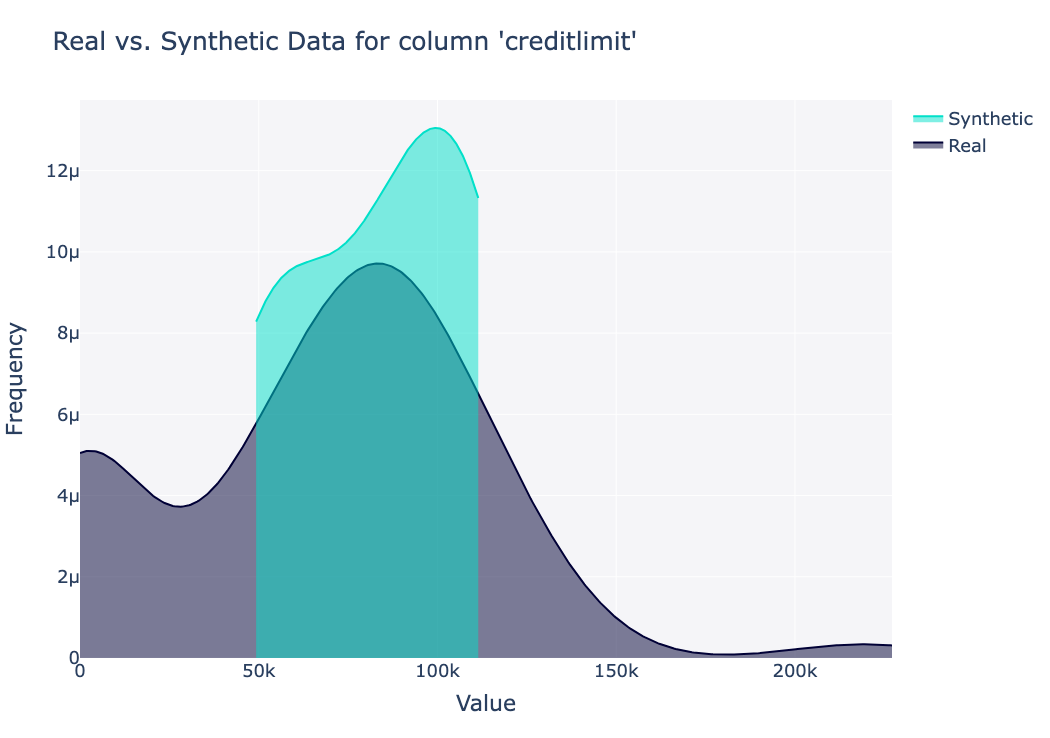

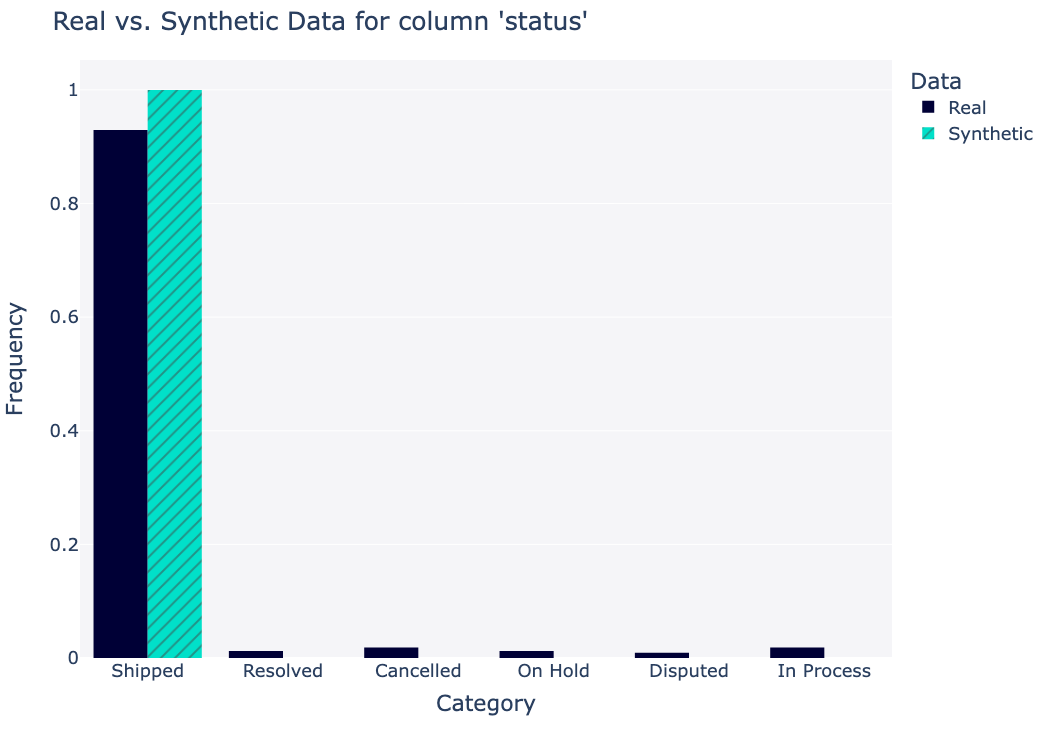

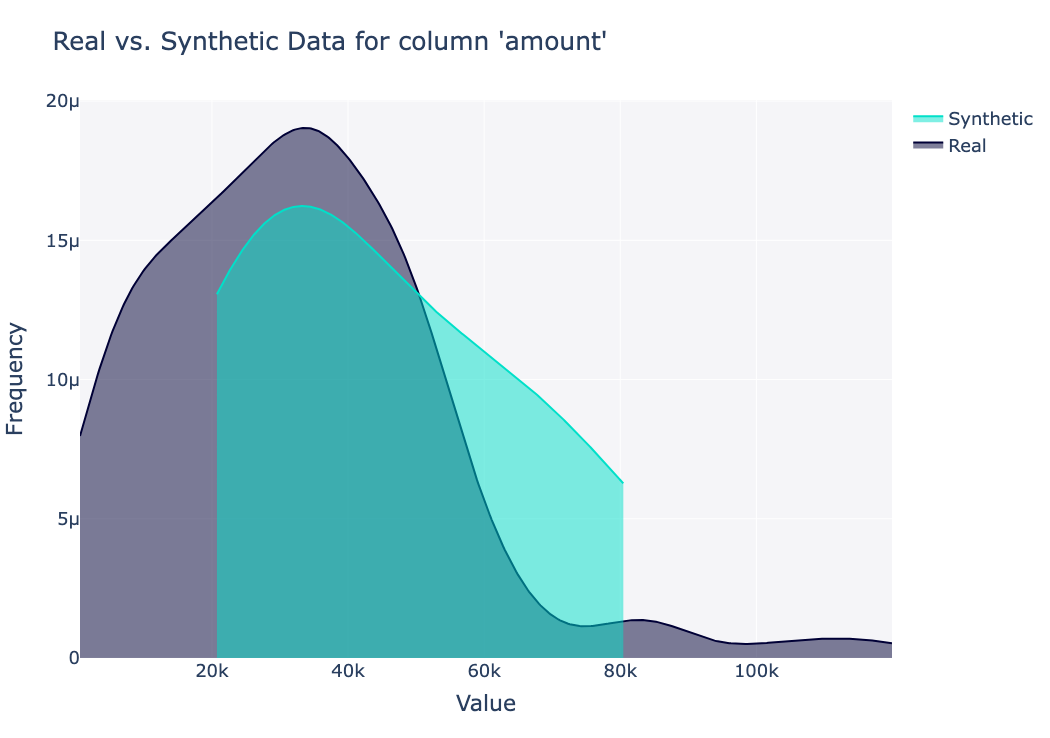

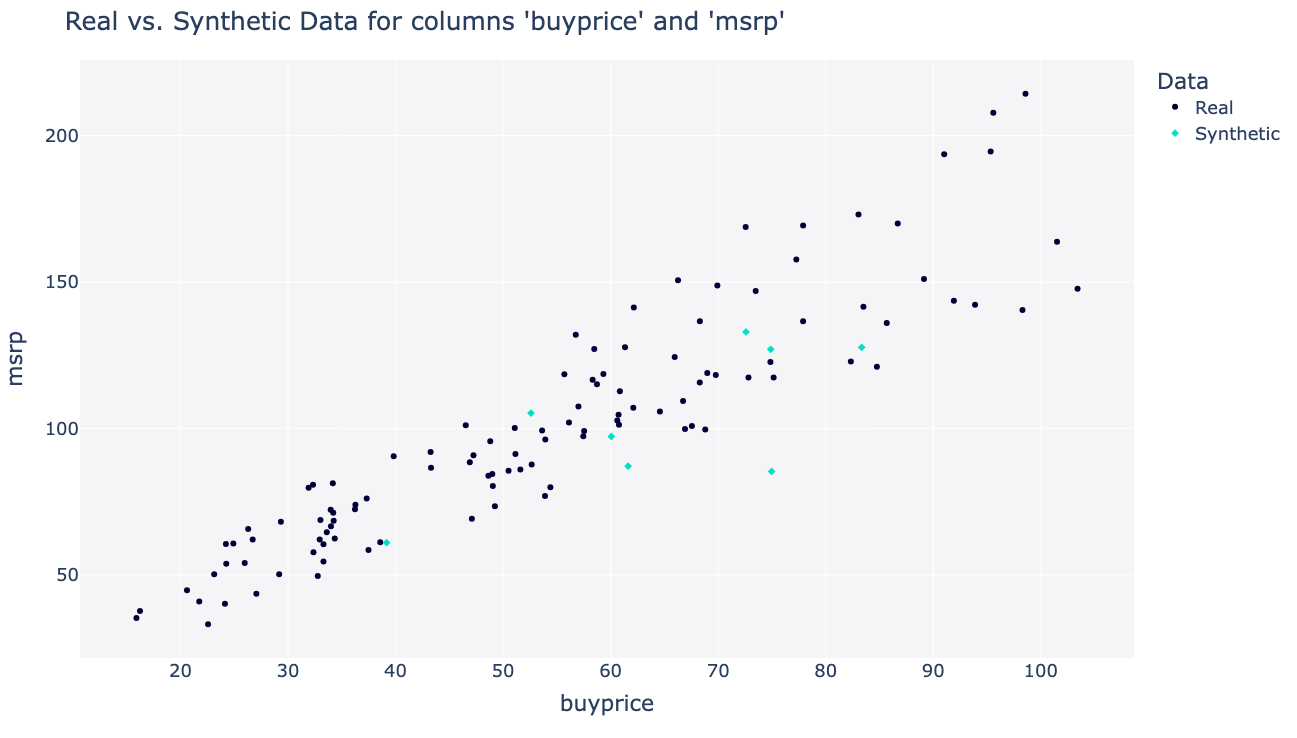

In [89]:
for file in os.listdir("pictures_copula/"):
    if file.endswith(".png"):
        display(Image(filename='pictures_copula/'+file))


In [94]:
fig = get_column_plot(
    real_data=data['payments'],
    synthetic_data=synthetic_data_ctgan['payments'],
    column_name='amount',
    metadata=metadata.tables['payments'],
)
fig.write_html("payments_ctgan.html")


fig = get_column_plot(
    real_data=data['customers'],
    synthetic_data=synthetic_data_ctgan['customers'],
    column_name='creditlimit',
    metadata=metadata.tables['customers'],
)
fig.write_html("creditlimit_ctgan.html")

fig = get_column_plot(
    real_data=data['orders'],
    synthetic_data=synthetic_data_ctgan['orders'],
    column_name='status',
    metadata=metadata.tables['orders'],
)
fig.write_html("status_ctgan.html")

fig = get_column_pair_plot(
    real_data=data['products'],
    synthetic_data=synthetic_data_ctgan['products'],
    column_names=['buyprice', 'msrp'],
    metadata=metadata.tables['products'],
)
fig.write_html("buyprice_msrp_ctgan.html")


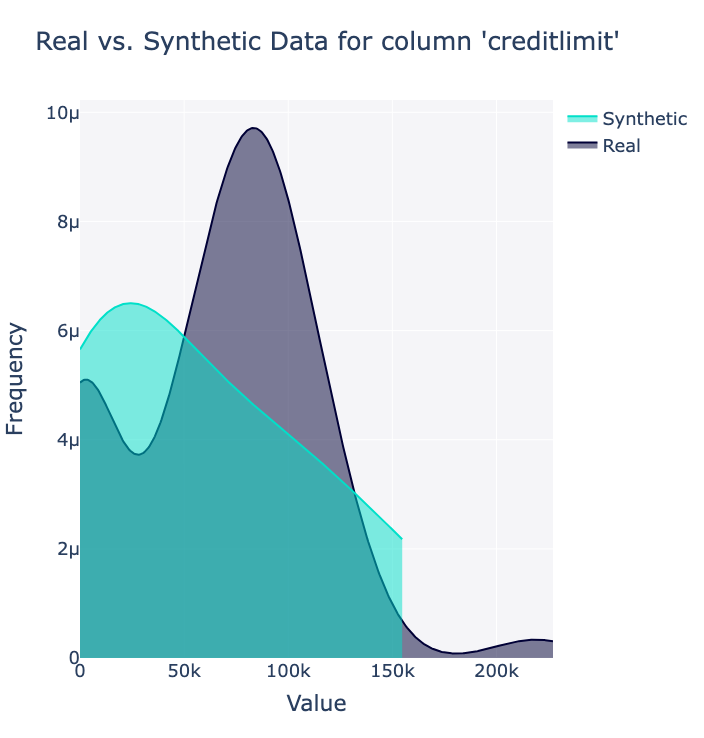

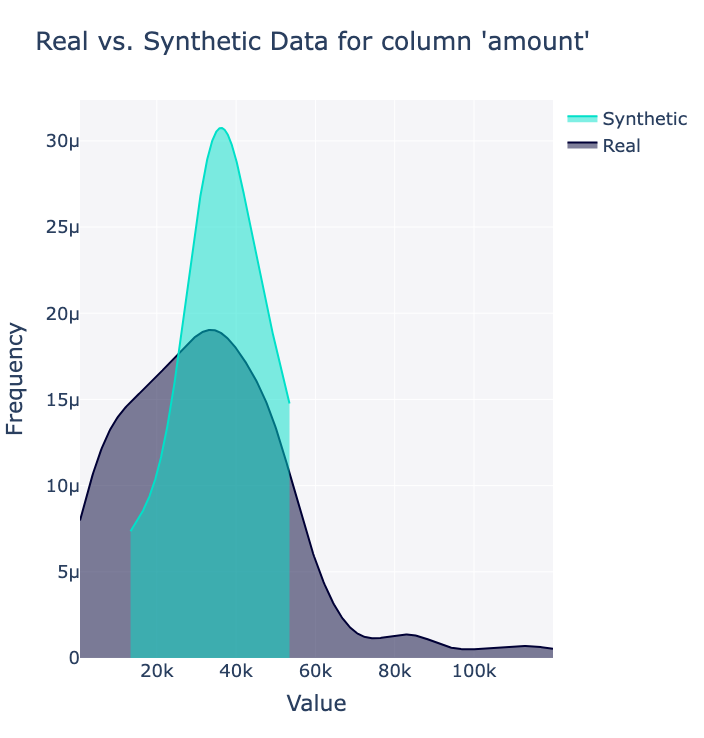

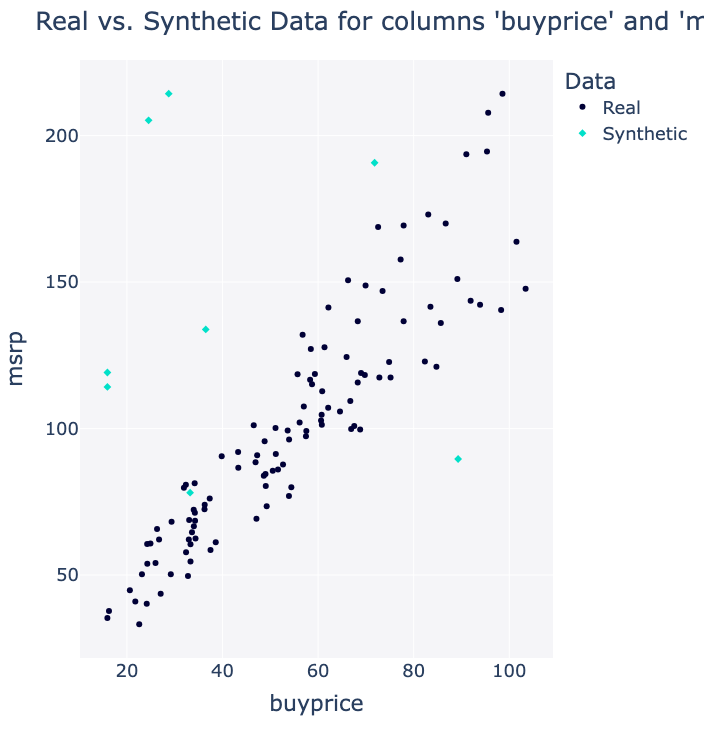

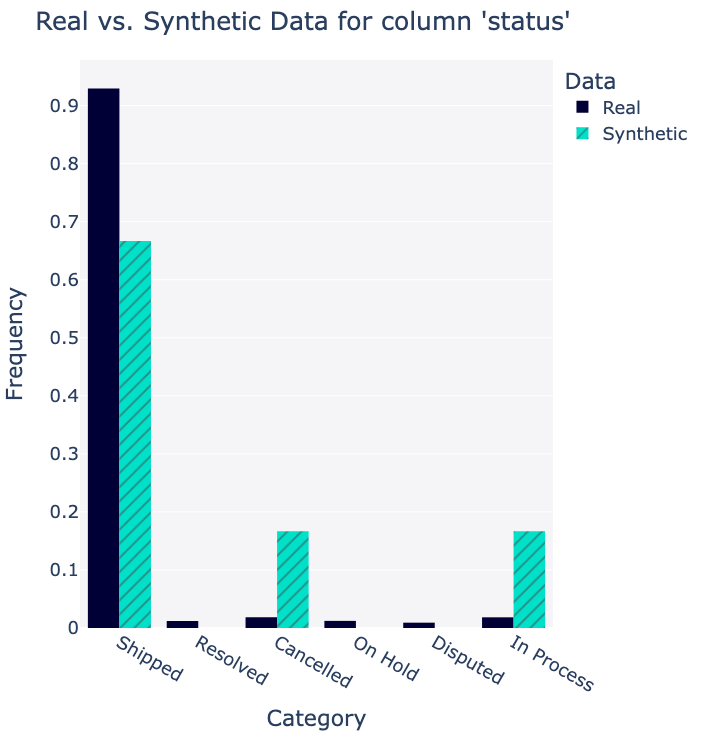

In [95]:

for file in os.listdir("pictures_ctgan/"):
    if file.endswith(".png"):
        display(Image(filename='pictures_ctgan/'+file))

In [146]:


list_copula_evaluation = copula_evaluation['quality_report'].tolist()
list_copula_evaluation
list_copula_details = []
for i in range(len(list_copula_evaluation)):
    list_copula_details.append(list_copula_evaluation[i].get_details('Column Shapes')[0:2:2])


for j in range(len(list_copula_details)):
    if list_copula_details[j].empty != True:
        print(list_copula_details[j])





        Column        Metric     Score
0  creditlimit  KSComplement  0.704918
         Column        Metric     Score
0  productscale  TVComplement  0.661364
      Column        Metric     Score
0  orderdate  KSComplement  0.653374
            Column        Metric  Score  \
0  htmldescription  KSComplement    NaN   

                                                   Error  
0  ValueError: Data passed to ks_2samp must not be empty  
        Column        Metric     Score
0  paymentdate  KSComplement  0.777015
            Column        Metric     Score
0  quantityordered  KSComplement  0.780819
      Column        Metric     Score
0  extension  TVComplement  0.347826
      Column        Metric  Score
0  territory  TVComplement   0.75


In [147]:
list_ctgan_evaluation = ctgan_evaluation['quality_report'].tolist()

list_ctgan_details = []
for i in range(len(list_ctgan_evaluation)):
    list_ctgan_details.append(list_ctgan_evaluation[i].get_details('Column Shapes')[0:2:2])


for j in range(len(list_ctgan_details)):
    if list_ctgan_details[j].empty != True:
        print(list_ctgan_details[j])


        Column        Metric     Score
0  creditlimit  KSComplement  0.685792
         Column        Metric     Score
0  productscale  TVComplement  0.693182
      Column        Metric     Score
0  orderdate  KSComplement  0.474438
            Column        Metric  Score  \
0  htmldescription  KSComplement    NaN   

                                                   Error  
0  ValueError: Data passed to ks_2samp must not be empty  
        Column        Metric     Score
0  paymentdate  KSComplement  0.668498
            Column        Metric     Score
0  quantityordered  KSComplement  0.667557
      Column        Metric    Score
0  extension  TVComplement  0.26087
      Column        Metric  Score
0  territory  TVComplement    0.5


In [155]:
synthetic_data_copula['customers'].head(10)

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
0,0,Natalie,Anderson,Mark,(391)691-3492,26172 Johnson Land Apt. 604,NaN,Butlermouth,Louisiana,33252,AD,71240.0,49273.0
1,1,Troy,Barnes,Emily,001-214-733-3855,4962 Thompson Meadow,Apt. 928,Perezburgh,New Jersey,23465,CA,8524.0,111532.0
2,2,Caroline,Munoz,Sarah,697-548-9056,803 Fuentes Mountain,NaN,North Mary,NaN,70783,FM,60062.0,59952.0
3,3,Joseph,Lopez,Brandi,253.674.8292x74140,54744 Morris Parkways,NaN,East Kevinburgh,NaN,69204,AL,1877.0,82925.0
4,4,Walter,Kelly,Dustin,001-893-727-1691x525,89419 Abigail Estate Suite 090,Suite 388,East Loristad,NaN,87148,CI,1771.0,52917.0
5,5,John,Horn,Christopher,778.406.4265x302,8537 Bennett Spurs,NaN,East Carolyn,NaN,57571,LU,96628.0,108940.0
6,6,Dennis,Oconnell,Peter,826.281.4895x666,560 Faith Cape,NaN,Port Lawrence,NaN,48312,CR,17074.0,84455.0
7,7,Benjamin,Murphy,Brandy,805.214.7597x5605,584 Larry Glen Apt. 284,NaN,Port Karenstad,Oregon,30625,LI,68698.0,96645.0
8,8,Julia,Romero,Sabrina,813.792.6121x75446,4930 James Haven Apt. 816,NaN,Mitchellborough,Massachusetts,01288,ZA,85018.0,109108.0


In [156]:
synthetic_data_ctgan['customers'].head(10)

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
0,0,Natalie,Anderson,Mark,(391)691-3492,26172 Johnson Land Apt. 604,NaN,Butlermouth,Louisiana,33252,AD,71240.0,50017.0
1,1,Troy,Barnes,Emily,001-214-733-3855,4962 Thompson Meadow,Apt. 928,Perezburgh,New Jersey,23465,CA,8524.0,16104.0
2,2,Caroline,Munoz,Sarah,697-548-9056,803 Fuentes Mountain,NaN,North Mary,NaN,70783,FM,60062.0,12239.0
3,3,Joseph,Lopez,Brandi,253.674.8292x74140,54744 Morris Parkways,NaN,East Kevinburgh,NaN,69204,AL,1877.0,93863.0
4,4,Walter,Kelly,Dustin,001-893-727-1691x525,89419 Abigail Estate Suite 090,Suite 388,East Loristad,NaN,87148,CI,1771.0,0.0
5,5,John,Horn,Christopher,778.406.4265x302,8537 Bennett Spurs,NaN,East Carolyn,NaN,57571,LU,96628.0,155037.0
6,6,Dennis,Oconnell,Peter,826.281.4895x666,560 Faith Cape,NaN,Port Lawrence,NaN,48312,CR,17074.0,5973.0
7,7,Benjamin,Murphy,Brandy,805.214.7597x5605,584 Larry Glen Apt. 284,NaN,Port Karenstad,Oregon,30625,LI,68698.0,59331.0
8,8,Julia,Romero,Sabrina,813.792.6121x75446,4930 James Haven Apt. 816,NaN,Mitchellborough,Massachusetts,01288,ZA,85018.0,111147.0


In [157]:
data['customers'].head(10)

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,NaN,San Rafael,CA,97562,USA,1165.0,210500.0
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,NaN,Warszawa,NaN,01-012,Poland,1501.0,0.0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,1504.0,59700.0
8,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,94217,USA,1165.0,64600.0
9,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,1323.0,114900.0


In [152]:
synthetic_data_copula['offices'].head(10)

,officecode,city,phone,addressline1,addressline2,state,country,postalcode,territory
0,0,East Carolinehaven,(253)762-4289,3713 Combs Drives,Apt. 087,NaN,AR,77331,NaN
1,1,Farleybury,(839)841-4282x92987,805 Pamela Rue,Apt. 877,North Dakota,LC,92925,Japan
2,2,Yorkborough,+1-860-444-3432,321 Michael Lakes,NaN,Utah,SO,66577,NaN
3,3,West Justinhaven,001-390-443-1992x2126,4279 Flores Keys Suite 116,Apt. 432,Iowa,FJ,18019,EMEA
4,4,West John,001-735-614-3460x51003,6544 Erika Way,Suite 213,NaN,BW,35424,NaN
5,5,Masonbury,+1-227-775-3906,843 Humphrey Mews Apt. 208,Suite 477,NaN,BR,42642,Japan
6,6,New Andrew,+1-905-487-2504x91351,08694 Bailey Plains Suite 284,NaN,Alabama,DJ,22692,EMEA


In [153]:
synthetic_data_ctgan['offices'].head(10)

,officecode,city,phone,addressline1,addressline2,state,country,postalcode,territory
0,0,East Carolinehaven,(253)762-4289,3713 Combs Drives,Apt. 087,NaN,AR,77331,Japan
1,1,Farleybury,(839)841-4282x92987,805 Pamela Rue,Apt. 877,North Dakota,LC,92925,NaN
2,2,Yorkborough,+1-860-444-3432,321 Michael Lakes,NaN,Utah,SO,66577,Japan
3,3,West Justinhaven,001-390-443-1992x2126,4279 Flores Keys Suite 116,Apt. 432,Iowa,FJ,18019,Japan
4,4,West John,001-735-614-3460x51003,6544 Erika Way,Suite 213,NaN,BW,35424,EMEA
5,5,Masonbury,+1-227-775-3906,843 Humphrey Mews Apt. 208,Suite 477,NaN,BR,42642,NaN
6,6,New Andrew,+1-905-487-2504x91351,08694 Bailey Plains Suite 284,NaN,Alabama,DJ,22692,NaN


In [154]:
data['offices'].head(10)

,officecode,city,phone,addressline1,addressline2,state,country,postalcode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NaN
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NaN
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NaN
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy Dabbans,NaN,NaN,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,NaN,Chiyoda-Ku,Japan,102-8578,Japan
5,6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,NaN,Australia,NSW 2010,APAC
6,7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,NaN,UK,EC2N 1HN,EMEA


## Results based on plots:

### **_copula data coinsides with real data more than ctgan_**

## Result based on evaluation:

### **_using list_ctgan_details and list_copula_details we can see that ctgan is better at generating data for the columns that are not categorical_**

## Results showed with data examples:

### **_both ways are not perfect, but still copula has higher level of accuracy and this data has better quality_**